In [7]:
from Simplextep import Problem_Prepration

# Define your problem here
objective_function = [0, 6, 5, 4]
constraints = [[240 , 2, 1, 1], [360 , 1, 3, 2], [300 , 2, 1, 2]]
equality = ["leq", "leq", "leq"]
parameters = [("x1", "+"), ("x2", "+"), ("x3", "+")]
problem = Problem_Prepration(objective_function = objective_function, 
                            constraints = constraints,
                            equality = equality,
                            parameters = parameters,
                            mode ="max")
problem

[INFO] Add slack
[INFO] Add slack
[INFO] Add slack
[INFO] Parameter x1 remains same.
[INFO] Parameter x2 remains same.
[INFO] Parameter x3 remains same.


| B.V                  | R.H.S                | x1                   | x2                   | x3                   | s1                   | s2                   | s3                   |
|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|----------------------|
| s1                   | 240                  | 2                    | 1                    | 1                    | 1                    | 0                    | 0                    |
| s2                   | 360                  | 1                    | 3                    | 2                    | 0                    | 1                    | 0                    |
| s3                   | 300                  | 2                    | 1                    | 2                    | 0                    | 0                    | 1                    |
| -z                   | 0                    | 6                    |

In [ ]:
from Simplextep import Simplex

simplex = Simplex(problem)
solution = simplex.fit()
print()
simplex.make_table(format_="latex") # View the steps and previous tables
print()

[INFO] One phase solution
Finished.
|    |   R.H.S |   x1 |   x2 |   x3 |   s1 |   s2 |   s3 |
|----|---------|------|------|------|------|------|------|
|  0 |   912.0 | 72.0 | 96.0 |  0.0 |  0.0 |  0.0 | 60.0 |

\begin{tabular}{llllllll}
\hline
 B.V                  & R.H.S                & x1                   & x2                   & x3                   & s1                   & s2                   & s3                   \\
\hline
 s1                   & 240.0                & 2.0                  & 1.0                  & 1.0                  & 1.0                  & 0.0                  & 0.0                  \\
 s2                   & 360.0                & 1.0                  & 3.0                  & 2.0                  & 0.0                  & 1.0                  & 0.0                  \\
 s3                   & 300.0                & 2.0                  & 1.0                  & 2.0                  & 0.0                  & 0.0                  & 1.0                  \\
 -

,R.H.S,x1,x2,x3,s1,s2,s3
0,912.0,72.0,96.0,0,0,0,60.0


In [15]:
simplex.result["x1"][0]

np.float64(72.0)

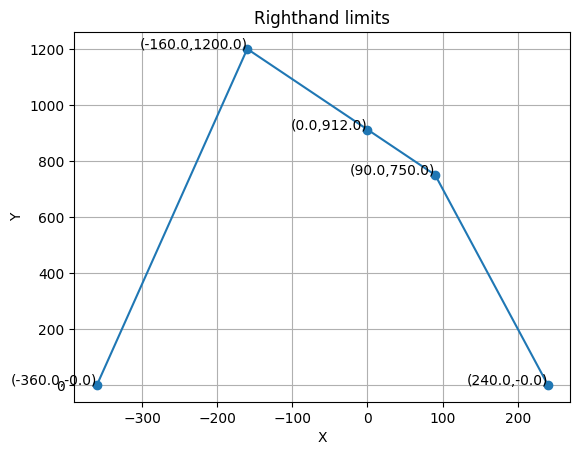

[[0, 912.0], [-159.99999999999997, 1200.0], [-359.99999999999994, -4.547473508864641e-13], [90.0, 750.0], [240.0, -0.0]]
{'x1': 0, 'x2': 0, 'x3': 0.20000000000000018, 's1': 2.6, 's2': 0.8, 's3': 0}


In [95]:
from Simplextep import Sensitivity_Analysis

analysis = Sensitivity_Analysis(simplex)
analysis.change_righthand(righthands_at_first=[-1, 1, 0, 0])
# Analyze changes in right - hand side
print(analysis.righthand_nodes) # If needed.

analysis.make_shadow_prices()
print(analysis.shadow_prices)

In [ ]:
from Simplextep import Dual

objective_function = [0, 6, 5, 4]
constraints = [[240 , 2, 1, 1], [360 , 1, 3, 2], [300 , 2, 1, 2]]
equality = ["leq", "leq", "eq"]
parameters = [("x1", "+"), ("x2", "+"), ("x3", "+")]
mode = "max"

dual_problem = Dual(objective_function,
                    constraints,
                    equality,
                    parameters,
                    mode)
print(dual_problem)

dual_problem.fit()

[INFO] Dual Problem setting is set successfully.
| Basic Variables   | Current Values   | ('Y1', '+')     | ('Y2', '+')     | ('Y3', 'n')     |
|-------------------|------------------|-----------------|-----------------|-----------------|
| s                 | -6               | -2              | -1              | -2              |
| s                 | -5               | -1              | -3              | -1              |
| s                 | -4               | -1              | -2              | -2              |
| -z                | 0                | 240             | 360             | 300             |
| ---------------   | ---------------  | --------------- | --------------- | --------------- |
[INFO] Add excess & artificial
[INFO] Add excess & artificial
[INFO] Add excess & artificial
[INFO] Parameter Y1 remains same.
[INFO] Parameter Y2 remains same.
[INFO] Parameter Y3 changed to Y3' and Y3''(Y3 = Y3' - Y3'')
[INFO] Dual New Problem had been made successfully.


In [37]:
from Simplextep import Dual, Simplex
objective_function = [0, 2, 1]
constraints = [[4 , 1, 1], [2, 1, -1]]
equality = ["ineq", "eq"]
parameters = [("x1", "+"), ("x2", "+")]
mode = "max"
dual_problem = Dual (objective_function,
                     constraints,
                     equality,
                     parameters,
                     mode)
print(dual_problem)
dual_problem.fit()
simplex = Simplex(problem=dual_problem.problem)
simplex.fit(max_iterations=10)

[INFO] Dual Problem setting is set successfully.
| Basic Variables   | Current Values   | ('Y1', '+')     | ('Y2', 'n')     |
|-------------------|------------------|-----------------|-----------------|
| s                 | -2               | -1              | -1              |
| s                 | -1               | -1              | 1               |
| -z                | 0                | 4               | 2               |
| ---------------   | ---------------  | --------------- | --------------- |
[INFO] Add excess & artificial
[INFO] Add excess & artificial
[INFO] Parameter Y1 remains same.
[INFO] Parameter Y2 changed to Y2' and Y2''(Y2 = Y2' - Y2'')
[INFO] Dual New Problem had been made successfully.
[INFO] Two phase solution
[INFO] Phase I starts | Finished
[INFO] Phase II Starts | Finished.
|    |   Current Values |   Y1 |   Y2' |   e1 |   y1 |   e2 |   y2 |   Y2'' |
|----|------------------|------|-------|------|------|------|------|--------|
|  0 |              7.0 |  1.5